In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
import time
import math

random.seed(time.time_ns())

In [2]:
class Environment:
    def __init__(self, k):
        self.k = k
        self.probabilities = [0] * k
        for i in range(0,len(self.probabilities)):
            self.probabilities[i] = round(random.uniform(0,1), 2)

    def output(self, i):
        return random.uniform(0,1) < self.probabilities[i]

    def max(self, i):
        if self.probabilities[i] == max(self.probabilities):
            return True
        else:
            return False


In [3]:
class LearningAutomaton:
    def __init__(self, k=10, alpha=0.5, beta=0.1, iterations=5000):
        self.k = k
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

        # array of possible actions (if k = 10, then 10 possible actions)
        self.actions = [0,1,2,3,4,5,6,7,8,9]

        # array of probabilities corresponding to which action will be selected
        self.probs = [0] * k
        for i in range(0,len(self.probs)):
            self.probs[i] = 0.1

        self.total_rewards = 0
        self.num_optimal_actions = 0

        # arrays for results data
        self.x = [0]
        self.y1 = [0]
        self.y2 = [0]

    def learn(self, environment):
        for iter in range(1, self.iterations + 1):
            i = random.choices(self.actions, weights = self.probs)[0]
            signal = environment.output(i)

            if signal == 1:
                # increase slightly probablity of choosing action i
                self.probs[i] = self.probs[i] + self.alpha * (1 - self.probs[i])
                for j in range(0,len(self.probs)):
                    if j != i:
                        # decrease all other probabilities proportionally
                        self.probs[j] = (1 - self.alpha) * self.probs[j]

            elif signal == 0:
                # decrease slightly probability of choosing action i
                self.probs[i] = (1 - self.beta) * self.probs[i]
                for j in range(0, len(self.probs)):
                    if j != i:
                        # increase all other probabilities proportionally
                        self.probs[j] = (self.beta / (self.k - 1) ) + (1 - self.beta) * self.probs[j]

            self.total_rewards += signal
            if environment.max(i):
                self.num_optimal_actions += 1

            self.x.append(iter)
            self.y1.append(self.total_rewards / iter)
            self.y2.append(self.num_optimal_actions / iter * 100)

        return self.x, self.y1, self.y2

    def printData(self, countBy=100):
        for i in range(100, len(self.x), countBy):
            print("Iteration: ", self.x[i], "\n% optimal actions: ", self.y2[i], "\nAverage reward: ",  self.y1[i], "\n")

In [4]:
environment = Environment(k=10)
automaton = LearningAutomaton()
automaton.learn(environment)
automaton.printData()

Iteration:  100 
% optimal actions:  3.0 
Average reward:  0.53 

Iteration:  200 
% optimal actions:  2.0 
Average reward:  0.54 

Iteration:  300 
% optimal actions:  1.3333333333333335 
Average reward:  0.53 

Iteration:  400 
% optimal actions:  1.0 
Average reward:  0.54 

Iteration:  500 
% optimal actions:  3.8 
Average reward:  0.538 

Iteration:  600 
% optimal actions:  17.833333333333336 
Average reward:  0.5733333333333334 

Iteration:  700 
% optimal actions:  27.57142857142857 
Average reward:  0.6 

Iteration:  800 
% optimal actions:  32.75 
Average reward:  0.6175 

Iteration:  900 
% optimal actions:  37.0 
Average reward:  0.6277777777777778 

Iteration:  1000 
% optimal actions:  35.199999999999996 
Average reward:  0.635 

Iteration:  1100 
% optimal actions:  34.81818181818182 
Average reward:  0.6336363636363637 

Iteration:  1200 
% optimal actions:  32.083333333333336 
Average reward:  0.6341666666666667 

Iteration:  1300 
% optimal actions:  32.53846153846154

In [5]:
def runXtimes(environment, k=10, alpha=0.1, beta=0.1, reps=100, iter=5000):
    x_sum = np.zeros(iter+1)
    y1_sum = np.zeros(iter+1)
    y2_sum = np.zeros(iter+1)

    for i in range(0,reps):
        automaton = LearningAutomaton(k, alpha, beta, iter)
        automaton.learn(environment)
        x_sum = np.add(automaton.x, x_sum)
        y1_sum = np.add(automaton.y1, y1_sum)
        y2_sum = np.add(automaton.y2, y2_sum)

    return (x_sum/reps), (y1_sum/reps), (y2_sum/reps)

In [6]:

environment = Environment(k=10)
LRP_x, LRP_y1, LRP_y2 = runXtimes(environment, k=10, alpha=0.33, beta=0.01, reps=100, iter=5000)
LRI_x, LRI_y1, LRI_y2 = runXtimes(environment, k=10, alpha=0.33, beta=0, reps=100, iter=5000)

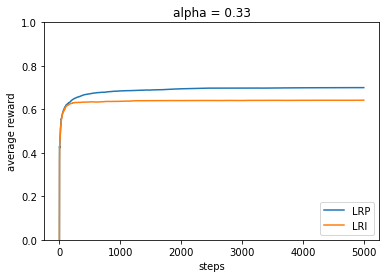

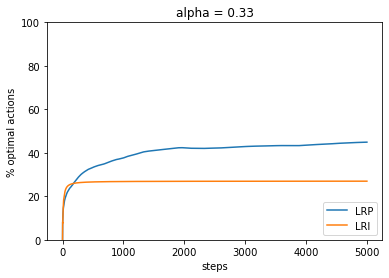

In [7]:
# plot data: average reward
plt.plot(LRP_x, LRP_y1, markersize=1, label='LRP')
plt.plot(LRI_x, LRI_y1, markersize=1, label='LRI')
plt.title('alpha = 0.33')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

# plot data: % optimal actions
plt.plot(LRP_x, LRP_y2, markersize=1, label='LRP')
plt.plot(LRI_x, LRI_y2, markersize=1, label='LRI')
plt.title('alpha = 0.33')
plt.xlabel('steps')
plt.ylabel('% optimal actions')
plt.ylim(0,100)
plt.legend(loc='lower right')
plt.show()